<a href="https://colab.research.google.com/github/Ishan-Gijavanekar/Netflix-Movie-Analysis/blob/main/MovieAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Movie Data Analysis
In 2007 Netflix introduced streaming servies, allowing the subcribers to watch the movies and TV shows instantly online. By 2010 company began international expansion starting with ccanada and by 2016 it was available in over 190 countries. Overall Netflix's evolution from a DVD rental service to a global streaming giant underscores its adaptibility and innovation approch in the entartainment industry.

# Questions

1. What are the most frequent genere of movies released on Netflix?
2. What generes has the highest votes?
3. What movie got the highest popularity? What's it genere?
4. What movie fot the lowest popularity? What's it genere?
5. Which year has the most filmed movies?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('netflixMovies.csv', lineterminator='\n')

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [10]:
# Changing the datatype of release date
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [8]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827,9827.000000,9827.000000,9827.000000
mean,2006-09-23 11:05:51.317798144,40.326088,1392.805536,6.439534
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-18 00:00:00,16.128500,146.000000,5.900000
50%,2011-09-13 00:00:00,21.199000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.191500,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.873998,2611.206907,1.129759


In [16]:
# Removing the unnecessery columns
df['Release_Date'] = df['Release_Date'].dt.year
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [17]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)

In [33]:
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery
5,2022,The Batman,3827.658,1151,Popular,Thriller
6,2022,No Exit,2618.087,122,Below_Average,Thriller
7,2021,Encanto,2402.201,5076,Popular,Animation
8,2021,Encanto,2402.201,5076,Popular,Comedy
9,2021,Encanto,2402.201,5076,Popular,Family


In [22]:
# Renaming the voting labels

def categorise_columns(df, col, labels):
    edges = [ df[col].describe()['min'],
              df[col].describe()['25%'],
              df[col].describe()['50%'],
              df[col].describe()['75%'],
              df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges , labels = labels, duplicates='drop')
    return df

In [23]:
labels = ['Not_Popular', 'Below_Average', 'Average', 'Popular']

categorise_columns(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['Popular', 'Below_Average', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Average' < 'Average' < 'Popular']

In [26]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
Not_Popular,2467
Popular,2450
Average,2412
Below_Average,2398


In [28]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


### Spilting the generes on different lines

In [32]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

In [37]:
# Casting columns into Category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [39]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


## Data Visualization
Getting the insights from the pre processed data


In [40]:
sns.set_style('whitegrid')

### What are the most frequent genere of movies released on Netflix?

In [41]:
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


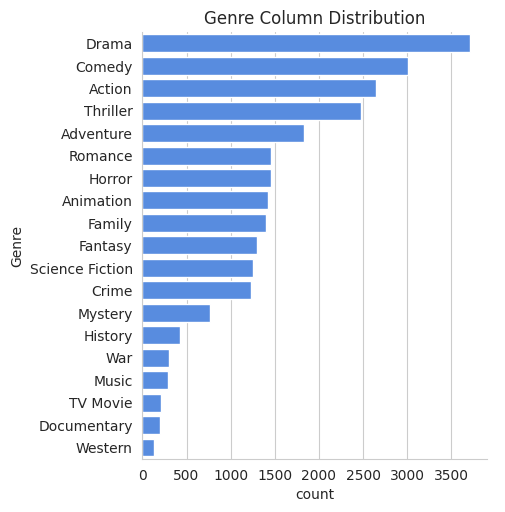

In [42]:
sns.catplot(y = 'Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='#4287F5')
plt.title('Genre Column Distribution')
plt.show()

### What generes has the highest votes?

In [43]:
df['Vote_Average'].describe()

,Vote_Average
count,25552
unique,4
top,Average
freq,6613


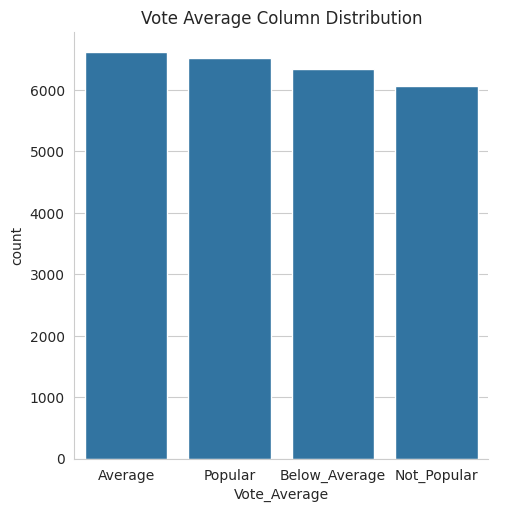

In [44]:
sns.catplot(x = 'Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index)
plt.title('Vote Average Column Distribution')
plt.show()

### What movie got the highest popularity? What's it genere?

In [45]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


### What movie fot the lowest popularity? What's it genere?

In [46]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


### Which year has the most filmed movies?

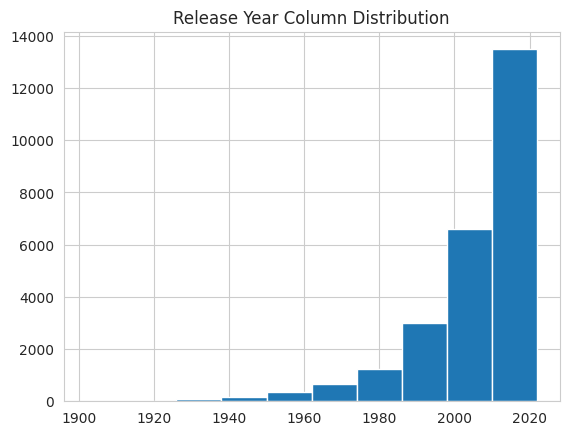

In [47]:
df['Release_Date'].hist()
plt.title('Release Year Column Distribution')
plt.show()

# Summary

1. From the plot we can clearly see that drama is most popular genre
2. The movies with the average vote rating are the maximum
3. Tha max popular is spider-man
4. The min popular are The United States vs. Billie Holiday	and Threads
5. We can see that in the year 2020 most of the films are released